In [2]:
# -----------------------------------------------
# Q1: PCA on Dataset
# -----------------------------------------------
import numpy as np

# Data for the first 3 students
student_scores = np.array([
    [1, 8, 9, 3],
    [3, 6, 3, 9],
    [4, 2, 1, 1]
])

# PCA weights
pca_weights = np.array([
    [0.8, 0.0, 0.8],
    [0.3, 0.8, 0.3],
    [0.9, 0.4, 0.3],
    [0.2, 0.8, 0.8]
])

# Calculating only PC1 and PC2
components_matrix = np.dot(student_scores, pca_weights[:, :2])

# Printing the 3x2 matrix
print(components_matrix)

[[11.9 12.4]
 [ 8.7 13.2]
 [ 4.9  2.8]]


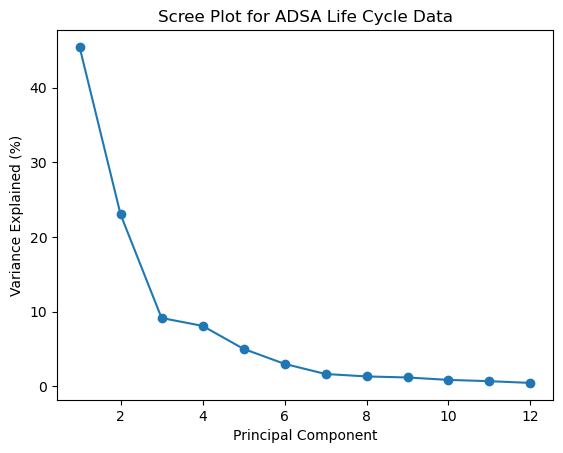

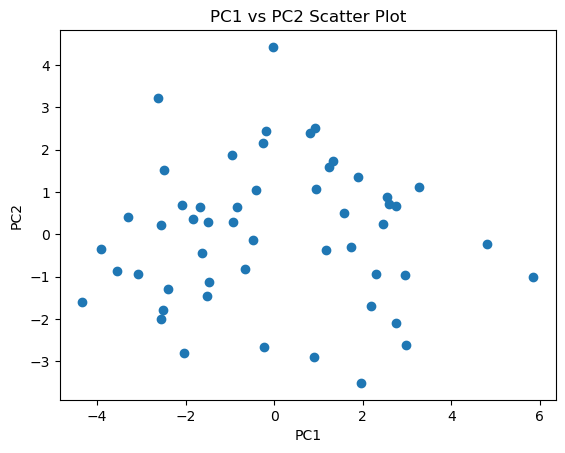

Variance explained by the first 2 components: 68.49%



In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE, SelectKBest, f_regression
from sklearn.linear_model import LinearRegression, LassoCV

# -----------------------------------------------
# Q2: PCA on ADSA Data Science Life Cycle Dataset
# -----------------------------------------------
df = pd.read_csv(r"D:\Documents\Sem_3\IS733\HW4\roles_life_cycle_mapping_wide.csv")
# Select only numeric columns for PCA
df_numeric = df.select_dtypes(include=[int, float])

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_numeric)

# PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# plot
plt.figure()
plt.plot(
    range(1, len(pca.explained_variance_ratio_) + 1),
    pca.explained_variance_ratio_ * 100,
    marker='o'
)
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained (%)')
plt.title('Scree Plot for ADSA Life Cycle Data')
plt.show()

# Scatter plot PC1 vs PC2
plt.figure()
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PC1 vs PC2 Scatter Plot')
plt.show()

variance_explained = pca.explained_variance_ratio_[:2].sum() * 100
print(f"Variance explained by the first 2 components: {variance_explained:.2f}%\n")



In [4]:
# -----------------------------------------------
# Q3: Feature Selection on BMI Dataset
# -----------------------------------------------
df_bmi = pd.read_csv(r"D:\Documents\Sem_3\IS733\HW4\BMI.csv")
y = df_bmi['fatpctg']
X = df_bmi.drop(columns=['fatpctg'])
feature_names = X.columns

# Wrapper method: RFE with Linear Regression
lr = LinearRegression()
rfe = RFE(lr, n_features_to_select=5)
rfe.fit(X, y)
wrap_selected = feature_names[rfe.support_]

# Embedded method: LassoCV, top 5 coefficients
lasso = LassoCV(cv=5, random_state=0).fit(X, y)
coef_importances = pd.Series(abs(lasso.coef_), index=feature_names)
embed_selected = coef_importances.nlargest(5).index

# Filter method: Univariate F-test
skb = SelectKBest(score_func=f_regression, k=5)
skb.fit(X, y)
filter_selected = feature_names[skb.get_support()]

print("Wrapper-selected features:", list(wrap_selected))
print("Embedded-selected features:", list(embed_selected))
print("Filter-selected features:", list(filter_selected))


Wrapper-selected features: ['Neck', 'Abdomen', 'Hip', 'Forearm', 'Wrist']
Embedded-selected features: ['Wrist', 'Abdomen', 'Neck', 'Forearm', 'Thigh']
Filter-selected features: ['Weight', 'Chest', 'Abdomen', 'Hip', 'Thigh']
